# Project Business Statistics: E-news Express

## Context

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

## Objective
Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

1. Explore the dataset and extract insights using Exploratory Data Analysis.

2. Do the users spend more time on the new landing page than the existing landing page?

3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

5. Is the time spent on the new page same for the different language users?


*Consider a significance level of 0.05 for all tests.

The  idea  behind  answering  these  questions  is  to  decide  whether  the  new  page  is  effective  enough  to  gather  new subscribers for the news portal. We will perform the statistical analysis on the collected data to make the business decision.


## Data Dictionary

1. user_id - This represents the user ID of the person visiting the website.

2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3. landing_page - This represents whether the landing page is new or old.

4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.

6. language_preferred - This represents the language chosen by the user to view the landing page.

## Import all the necessary libraries

In [81]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [82]:
# complete the code below to load the dataset
df = pd.read_csv('abtest.csv')

### Data Overview

In [83]:
# view a few rows of the data frame
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [84]:
# view the shape of the data frame
df.shape

(100, 6)

In [85]:
# check the data types of the columns in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


$Observation$ there is no none values. 100 row and 6 columms. time spend in the page is float64  while other columns are objec

### Fixing the data types

`converting "objects" to "category" reduces the space required to store the DataFrame. It also helps in analysis`

In [86]:
df['group'] = df['group'].astype('category')
df['landing_page'] = df['landing_page'].astype('category')
df['converted'] = df['converted'].astype('category')
df['language_preferred'] = df['language_preferred'].astype('category')

### Check for missing values

In [87]:

df.isna().sum() 

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

$observation$ there is no nan values 

### Five Point Summary

In [88]:
# write your code here to print the summary statistics
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,treatment,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


In [89]:
df['group'].value_counts()

treatment    50
control      50
Name: group, dtype: int64

In [90]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [91]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [92]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

**Observations**
* There are 100 unique users.
* There are 2 unique groups - control and treatment. Each group consists of 50 users.
* There are 2 landing_pages - new and old.
* Overall, 54 users get converted and 46 users do not get converted after visiting the landing page.
* There are 3 unique preferred languages - English, French, and Spanish.

### Univariate Analysis

In [93]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Time spent on the page

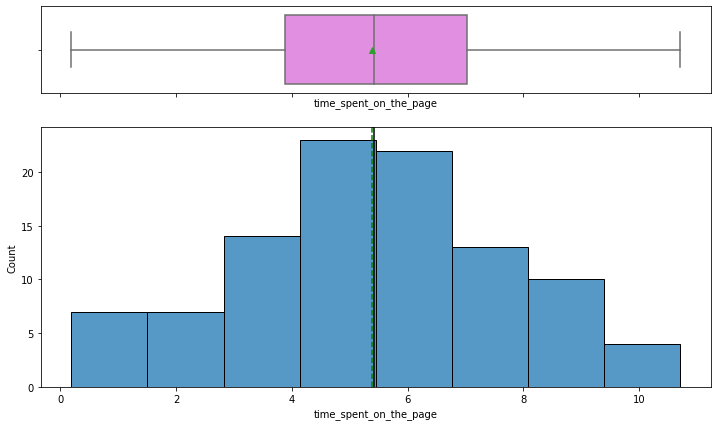

In [94]:
histogram_boxplot(df,"time_spent_on_the_page")

In [95]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

#### Group

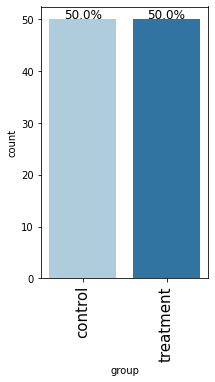

In [96]:
labeled_barplot(df,'group',perc = True)

#### Landing page

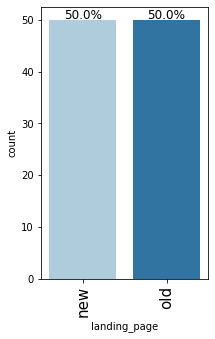

In [97]:

labeled_barplot(df,'landing_page',perc = True)

#### Converted

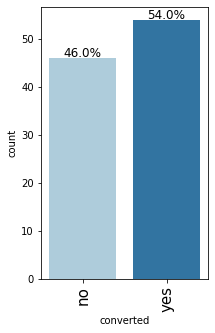

In [98]:
# write the code to plot the barplot of 'converted' column

labeled_barplot(df,'converted',perc = True)

#### Language preferred

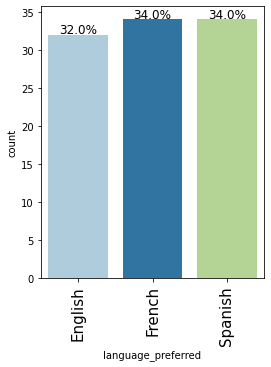

In [99]:

labeled_barplot(df,'language_preferred',perc = True)

### Bivariate Analysis

#### Landing page vs Time spent on the page

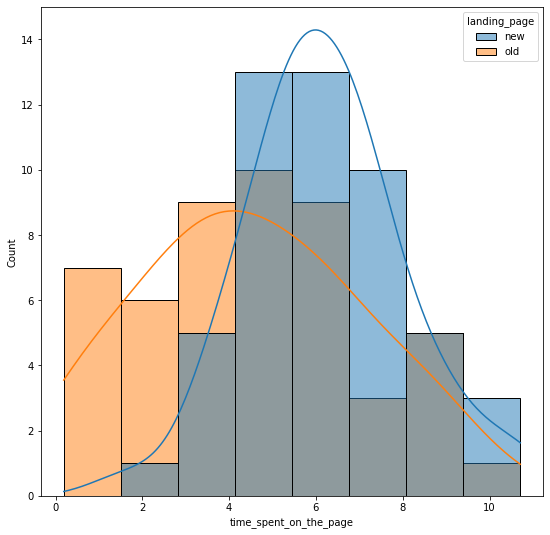

In [100]:
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'landing_page',kde=True)
plt.show()
#time spend on the page mean are higher for new landing page  than old landing page 

$observation$: the mean time spend on the page are higher for new landing page  than old landing page

#### Conversion status vs Time spent on the page

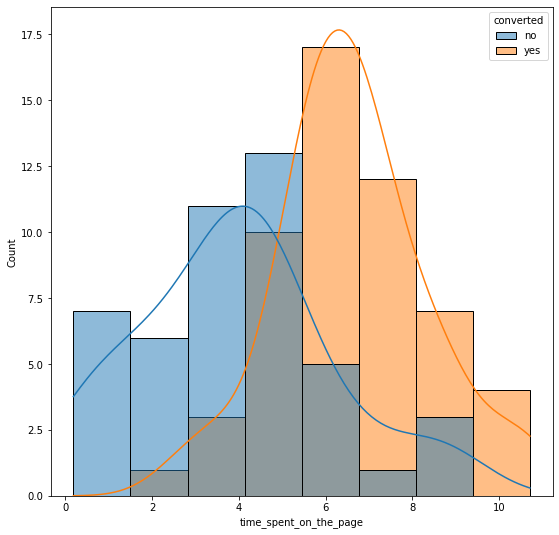

In [101]:
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'converted',kde=True)
plt.show()

$observation$: the mean time spend on the page are higher for converted page  than none converted page

#### Language preferred vs Time spent on the page

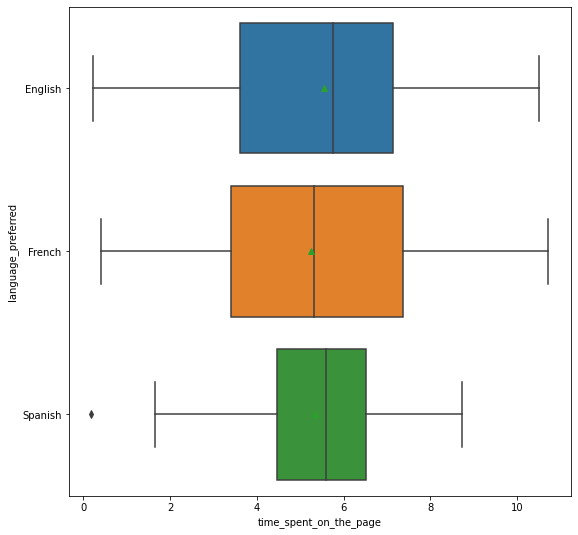

In [102]:

plt.figure(figsize=(9, 9))
sn=sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'language_preferred',showmeans=True)
sn.set_alpha=50
plt.show()

### Perform Visual Analysis

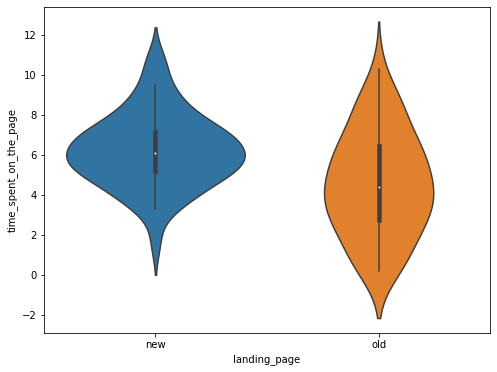

In [103]:
# visual analysis of the time spent on the new page
# and the time spent on the old page
plt.figure(figsize=(8,6))
sns.violinplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df,showmeans=True)
plt.show()

$observation$: the median time spend on the page are higher for new landing page  than old landing page

### Step 1: Define the null and alternate hypotheses

H0:u_new=u_old   
H1:u_new>n_old




### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **Based on this information, select the appropriate test**. 
* I select t_test 

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [105]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
# create subsetted data frame for old landing page users
time_spent_old =df[df['landing_page'] == 'old']['time_spent_on_the_page']


In [106]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**.

### Step 5: Calculate the p-value

In [107]:
# complete the code to import the required function
from scipy.stats import ttest_ind

# write the code to calculate the p-value
test_stat, p_value = ttest_ind(time_spent_new,time_spent_old,alternative='greater')   #write your code here

print('The p-value is', p_value)

The p-value is 0.0001316123528095005


### Step 6: Compare the p-value with $\alpha$

In [108]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001316123528095005 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

### Perform Visual Analysis

In [109]:
df['landing_page'].isin(['yes'])
df['landing_page'].isin(['no'])

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: landing_page, Length: 100, dtype: bool

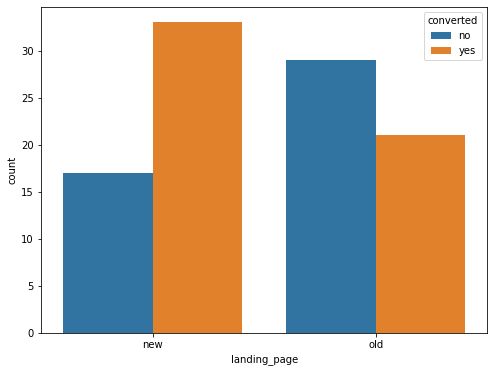

In [175]:
# write the code to visually compare the conversion rate for the new page and the conversion rate for the old page
plt.figure(figsize=(8,6))
sns.countplot(hue = 'converted', x = 'landing_page', data = df)
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

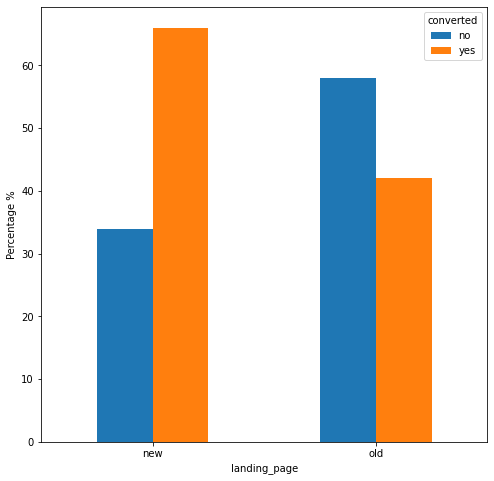

In [191]:
p1=pd.crosstab(  df['landing_page'],df['converted'],margins=False,margins_name="Total",normalize='index').round(4)*100
p11=p1.plot(kind='bar',  figsize=(8, 8), rot=0, ylabel='Percentage %', title="")


for p in p11.containers:
    plt.bar_label(p, fmt='%.1f%%', label_type='edge')

### Step 1: Define the null and alternate hypotheses

H0:Pn=Po
H1:Pn>Po



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, select the appropriate test**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [111]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
print('The numbers of converted users in treatment group and numbers of converted users in control  group are {0} and {1} respectively'.format(new_converted, old_converted ))
n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of converted users in treatment group and numbers of converted users in control  group are 33 and 21 respectively
The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [112]:
# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest  

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted,old_converted],[n_control,n_treatment],alternative='larger')   # write your code here

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [113]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

conversion rate visiting the new pages is higher to conversion rate of visiting the pages 



### Perform Visual Analysis

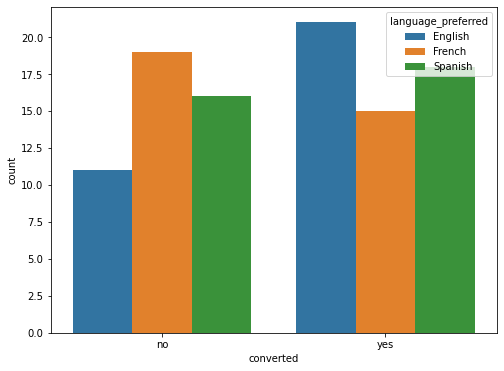

In [114]:
# write the code to visually plot the dependency between conversion status and preferred langauge

plt.figure(figsize=(8,6))
sns.countplot(x = 'converted', hue = 'language_preferred', data = df)


### Step 1: Define the null and alternate hypotheses

$H0:$ Converted statue is independent of preferred languages 

$H1:$ Converted statue is not independent of preferred languages 



### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. **Based on this information, select the appropriate test.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

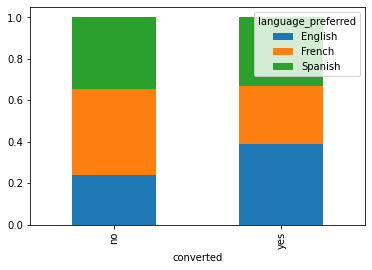

In [115]:
# complete the code to create a contingency table showing the distribution of the two categorical variables


contingency_table = pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot.bar(stacked=True)  

contingency_table

### Step 5: Calculate the p-value

In [116]:
# complete the code to import the required function
from scipy.stats import chi2_contingency 

# write the code to calculate the p-value
chi2, p_value, dof, exp_freq =  chi2_contingency(pd.crosstab(df['converted'],df['language_preferred']))  # write your code here

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [117]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

converted statues are independent of languages.



### Perform Visual Analysis

In [118]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

Text(0, 0.5, 'time spend on the new page')

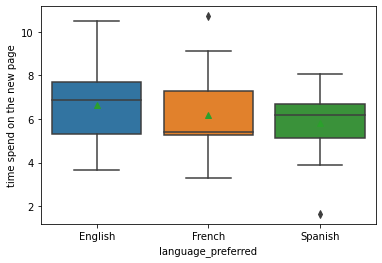

In [126]:
# write the code to visually plot the time spent on the new page for different language users

p=sns.boxplot(data=df_new,x='language_preferred',y='time_spent_on_the_page',showmeans=True)
p.set_ylabel('time spend on the new page')

In [120]:
# write the code to calculate the mean time spent on the new page for different language users
df_new.groupby('language_preferred').mean()['time_spent_on_the_page']

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

$H0:$ U_en=U_sp=U_fr

$H1:$ u are not equal



### Step 2: Select Appropriate test

This is a problem, concerning three population means. **Based on this information, select the appropriate test to compare the three population means.** Also, check the assumptions of normality and equality of variance for the three groups

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [127]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [128]:
#Assumption 2: Homogeneity of Variance
#import the required function 
from scipy.stats import levene
statistic, p_value = levene( df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [131]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French =    df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']# write your code here
time_spent_Spanish =    df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']# write your code here

### Step 5: Calculate the p-value

In [132]:
# complete the code to import the required function
from scipy.stats import f_oneway

# write the code to calculate the p-value
test_stat, p_value =  f_oneway(time_spent_English,time_spent_French,time_spent_Spanish)  # write your code here

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [133]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


Draw inference